In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [2]:
FIGURE_WIDTH = 5.39749
FIGURE_HEIGHT = 3.5

# Prepare data

In [3]:
START_DATE = "4/1/2020"
END_DATE = "4/30/2020"

In [4]:
df = pd.read_csv('owid-covid-data.csv')
df = df[df['location'] == 'Spain'].reset_index(drop=True)

In [5]:
start_idx = df[df['date'] == START_DATE].index[0]
end_idx = df[df['date'] == END_DATE].index[0]
df = df.iloc[start_idx:end_idx + 1].reset_index(drop=True)

In [6]:
drop_columns = list(df.columns)
drop_columns.remove('date')
drop_columns.remove('total_deaths')
df.drop(columns=drop_columns, inplace=True)

In [7]:
N = len(df)
new_deaths = []

for i in range(N):
    if i == 0:
        new_deaths.append(df.iloc[1].total_deaths - df.iloc[0].total_deaths)
    elif i == N - 1:
        new_deaths.append(df.iloc[i].total_deaths - df.iloc[i - 1].total_deaths)
    else:
        new_deaths.append((df.iloc[i + 1].total_deaths - df.iloc[i - 1].total_deaths) / 2)
        
df['new_deaths'] = new_deaths
df['relative_rate'] = df['new_deaths'] / df['total_deaths']

In [8]:
df

,date,total_deaths,new_deaths,relative_rate
0,4/1/2020,9387.0,961.0,0.102376
1,4/2/2020,10348.0,905.5,0.087505
2,4/3/2020,11198.0,799.5,0.071397
3,4/4/2020,11947.0,721.5,0.060392
4,4/5/2020,12641.0,697.0,0.055138
5,4/6/2020,13341.0,702.0,0.052620
6,4/7/2020,14045.0,725.5,0.051655
7,4/8/2020,14792.0,701.0,0.047390
8,4/9/2020,15447.0,644.5,0.041723
9,4/10/2020,16081.0,579.5,0.036036


# Visualization

In [9]:
x = list(range(N))
y = list(df['total_deaths'])

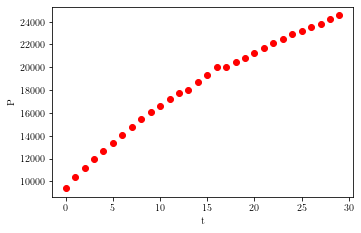

In [10]:
fig, ax = plt.subplots(figsize=(FIGURE_WIDTH, FIGURE_HEIGHT))
ax.set_xlabel('t')
ax.set_ylabel('P')
ax.plot(x, y, 'ro')

In [11]:
fig.savefig('fig1.pgf', backend='pgf', dpi=400)

In [12]:
x = np.array(df['total_deaths'])
y = np.array(df['relative_rate'])

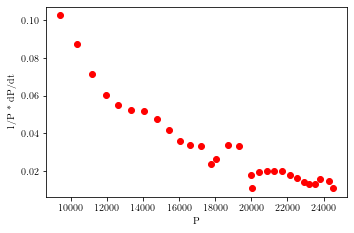

In [13]:
fig, ax = plt.subplots(figsize=(FIGURE_WIDTH, FIGURE_HEIGHT))
ax.set_xlabel('P')
ax.set_ylabel('1/P * dP/dt')
ax.plot(x, y, 'ro')

In [14]:
fig.savefig('fig2.pgf', backend='pgf', dpi=400)

In [15]:
a, b = np.polyfit(x, y, 1)

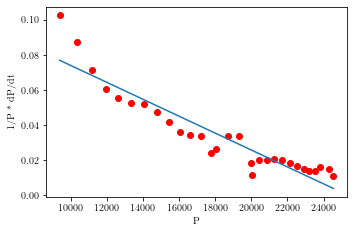

In [16]:
fig, ax = plt.subplots(figsize=(FIGURE_WIDTH, FIGURE_HEIGHT))
ax.set_xlabel('P')
ax.set_ylabel('1/P * dP/dt')
ax.plot(x, y, 'ro')
ax.plot(x, a * x + b)

In [17]:
fig.savefig('fig3.pgf', backend='pgf', dpi=400)

In [18]:
a, b

(-4.827879002776788e-06, 0.12215521367938273)

In [19]:
P_0 = df.iloc[0].total_deaths
A = P_0 / (a * P_0 + b)
P_0, A

(9387.0, 122169.433209181)

In [20]:
def calcP(t):
    return (b * A * math.exp(b * t)) / (1 - a * A * math.exp(b * t))

def calcdP(t):
    return (b * b * A * math.exp(b * t)) / ((1 - a * A * math.exp(b * t)) ** 2)

vcalcP = np.vectorize(calcP)
vcalcdP = np.vectorize(calcdP)

In [21]:
x = list(range(N))
y = list(df['total_deaths'])
x_pred = np.linspace(0, 2 * N, 1000)
y_pred = vcalcP(x_pred)

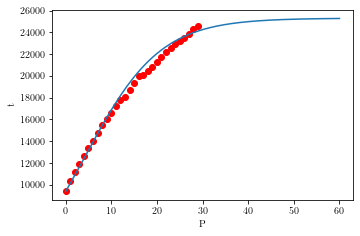

In [22]:
fig, ax = plt.subplots(figsize=(FIGURE_WIDTH, FIGURE_HEIGHT))
ax.set_xlabel('P')
ax.set_ylabel('t')
ax.plot(x, y, 'ro')
ax.plot(x_pred, y_pred)

In [23]:
fig.savefig('fig4.pgf', backend='pgf', dpi=400)

In [24]:
x = list(range(N))
y = list(df['new_deaths'])
x_pred = np.linspace(0, 2 * N, 1000)
y_pred = vcalcdP(x_pred)

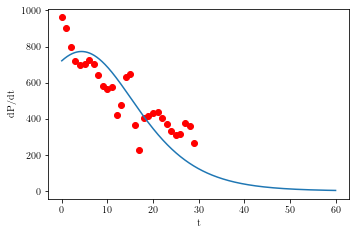

In [25]:
fig, ax = plt.subplots(figsize=(FIGURE_WIDTH, FIGURE_HEIGHT))
ax.set_xlabel('t')
ax.set_ylabel('dP/dt')
ax.plot(x, y, 'ro')
ax.plot(x_pred, y_pred)

In [26]:
fig.savefig('fig5.pgf', backend='pgf', dpi=400)

In [27]:
f = open('data.tex', 'w')

f.write('\\begin{table}[h!]\n')
f.write('\\centering\n')
f.write('\\tabulinesep=1.2mm\n')
f.write('\\begin{tabu}{ |c|c|c|c|c| }\n')
f.write('  \\hline\n')
f.write('  Date & $t$ & $P$ & $\\displaystyle\\diff{P}{t}$ & $\\dfrac{1}{P} \\displaystyle\\diff{P}{t}$ \\\\\n')
f.write('  \\hline\n')

for i in range(len(df)):
    row = df.iloc[i]
    f.write('  ' + row.date + \
            ' & ' + str(i) + \
            ' & ' + str(row.total_deaths) + \
            ' & ' + str(row.new_deaths) + \
            ' & ' + str(row.relative_rate) + \
            '\\\\\n')

f.write('  \\hline\n')
f.write('\\end{tabu}\n')
f.write('\\end{table}\n')

f.close()